In [20]:
import sys
sys.path.append('..')

from train_config.dataset import Dataset

In [21]:
import os
os.environ['SIIM_ACR_PNEUMOTORAX_SEGMENTATION_DATASET'] = r"C:\workspace\datasets\SIIM-ACR_Pneumothorax_Segmentation"

In [22]:
import matplotlib.pyplot as plt
import math
import numpy as np
%matplotlib inline
plt.rcParams["figure.figsize"] = (16, 5) # (w, h)

def viz_hist(analysing_dataset: Dataset) -> []:
    labels = []
    for item in analysing_dataset.get_items():
        if item[1] == -1:
            labels.append(0)
            continue

        labels.append(len(item[1]))
            
    print('Label values', set(labels))
    positives_cnt = np.count_nonzero(np.array(labels))
    if positives_cnt < len(labels):
        print('Negative:', len(labels) - positives_cnt, 'positive:', positives_cnt, 'ratio:', positives_cnt / (len(labels) - positives_cnt))

    plt.hist(labels)
    plt.grid()
    plt.yscale('log')
    plt.show()

# Analyse classification dataset

Overall images num: 10675
Label values {0, 1, 2, 3, 4, 5, 6, 7, 8, 10}
Negative: 8296 positive: 2379 ratio: 0.2867647058823529


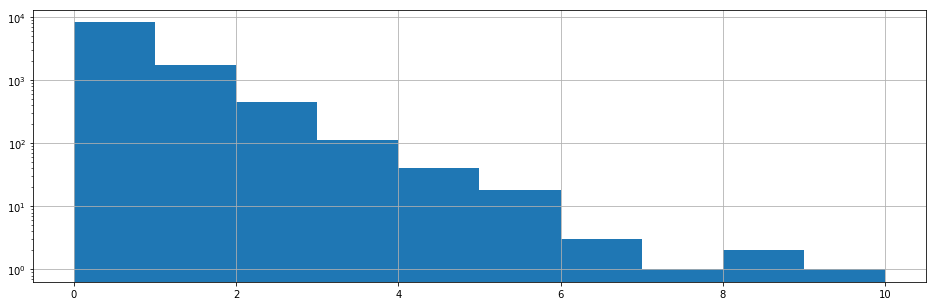

In [23]:
dataset = Dataset(is_test=False, include_negatives=True)
print("Overall images num: {}".format(len(dataset.get_items())))
viz_hist(dataset)

# Analyse segmentation dataset

Overall images num: 2379
Label values {1, 2, 3, 4, 5, 6, 7, 8, 10}


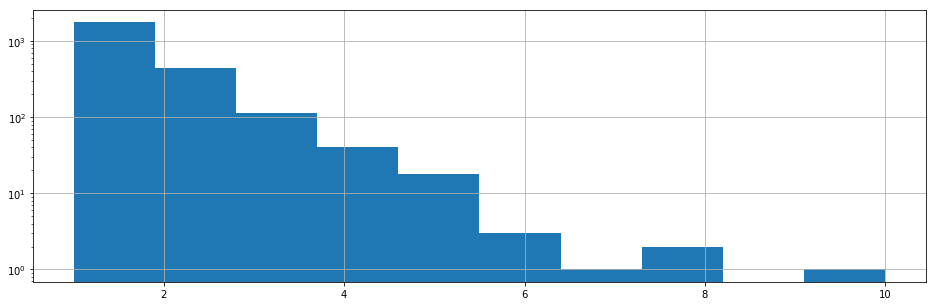

In [24]:
dataset = Dataset(is_test=False, include_negatives=False)
print("Overall images num: {}".format(len(dataset.get_items())))
viz_hist(dataset)

# Analyse data sizes

{1024}


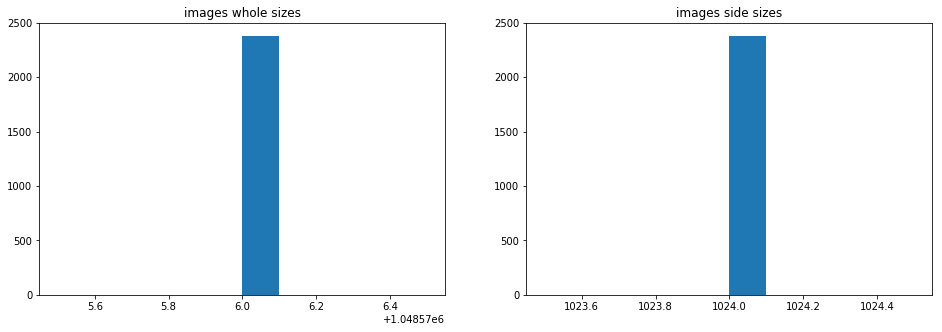

In [25]:
images_side_sizes = []
images_sizes = []

for it in dataset:
    images_side_sizes.append(it['data'].shape[0])
    images_sizes.append(it['data'].shape[0] * it['data'].shape[1])

print(set(images_side_sizes))
fig, axs = plt.subplots(1,2)
axs[0].hist(images_sizes)
axs[0].set_title('images whole sizes')
axs[1].hist(images_side_sizes)
axs[1].set_title('images side sizes')
plt.show()

# Classification dataset analysis

### Analyse class dataset train part

7468
Label values {0, 1, 2, 3, 4, 5, 6, 8, 10}
Negative: 5806 positive: 1662 ratio: 0.2862555976575956


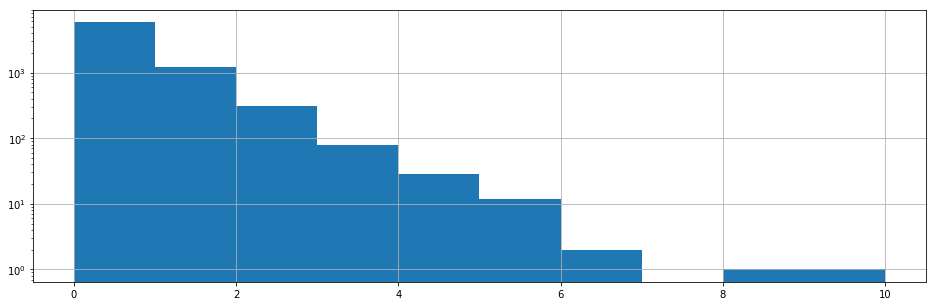

In [26]:
plt.rcParams["figure.figsize"] = (16, 5) # (w, h)

train_dataset = Dataset(is_test=False, include_negatives=True).load_indices('../data/indices/train_class.npy', remove_unused=True)
print(len(train_dataset))

viz_hist(train_dataset)

### Analyse class dataset validation part

2132
Label values {0, 1, 2, 3, 4, 5}
Negative: 1659 positive: 473 ratio: 0.28511151295961423


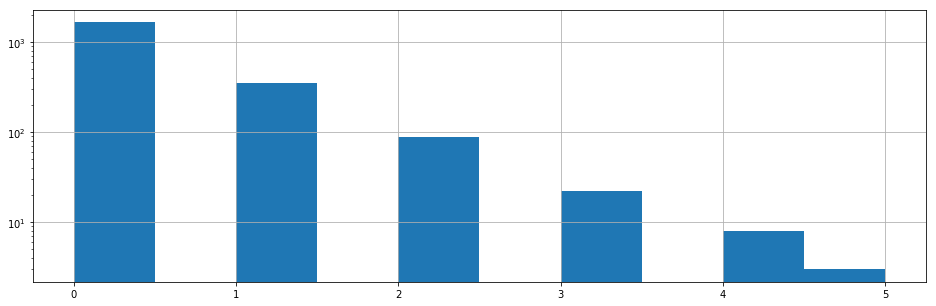

In [27]:
plt.rcParams["figure.figsize"] = (16, 5) # (w, h)

val_dataset = Dataset(is_test=False, include_negatives=True).load_indices('../data/indices/val_class.npy', remove_unused=True)
print(len(val_dataset))

viz_hist(val_dataset)

### Analyse class dataset test part

1064
Label values {0, 1, 2, 3, 4, 5}
Negative: 829 positive: 235 ratio: 0.28347406513872137


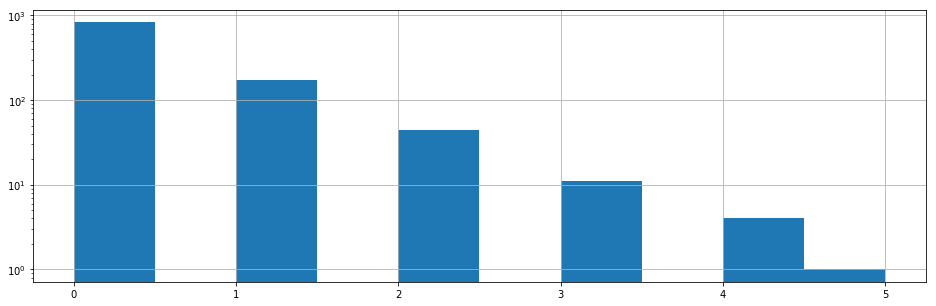

In [28]:
plt.rcParams["figure.figsize"] = (16, 5) # (w, h)

val_dataset = Dataset(is_test=False, include_negatives=True).load_indices('../data/indices/test_class.npy', remove_unused=True)
print(len(val_dataset))

viz_hist(val_dataset)

# Segmentation dataset analysis

### Analyse class dataset train part

1661
Label values {0, 1, 2, 3, 4, 5, 6, 7, 8}
Negative: 563 positive: 1098 ratio: 1.9502664298401422


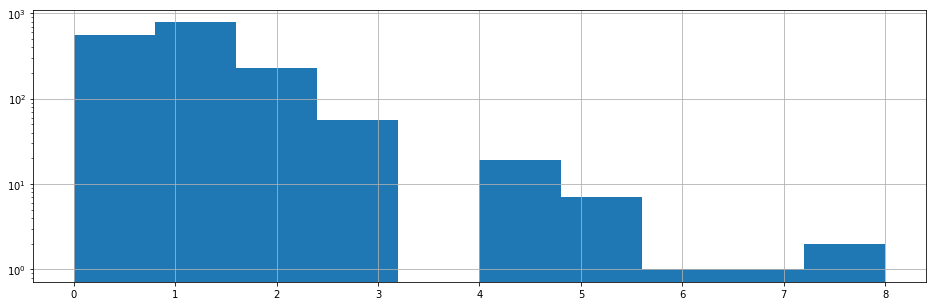

In [29]:
plt.rcParams["figure.figsize"] = (16, 5) # (w, h)

train_dataset = Dataset(is_test=False, include_negatives=True).load_indices('../data/indices/train_seg.npy', remove_unused=True)
print(len(train_dataset))

viz_hist(train_dataset)

### Analyse class dataset validation part

473
Label values {0, 1, 2, 3, 4, 5, 6}
Negative: 182 positive: 291 ratio: 1.598901098901099


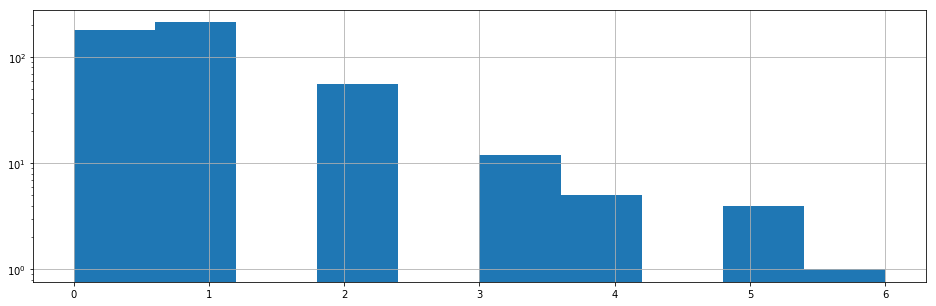

In [30]:
plt.rcParams["figure.figsize"] = (16, 5) # (w, h)

val_dataset = Dataset(is_test=False, include_negatives=True).load_indices('../data/indices/val_seg.npy', remove_unused=True)
print(len(val_dataset))

viz_hist(val_dataset)


### Analyse class dataset test part

235
Label values {0, 1, 2, 3, 4, 5, 6}
Negative: 80 positive: 155 ratio: 1.9375


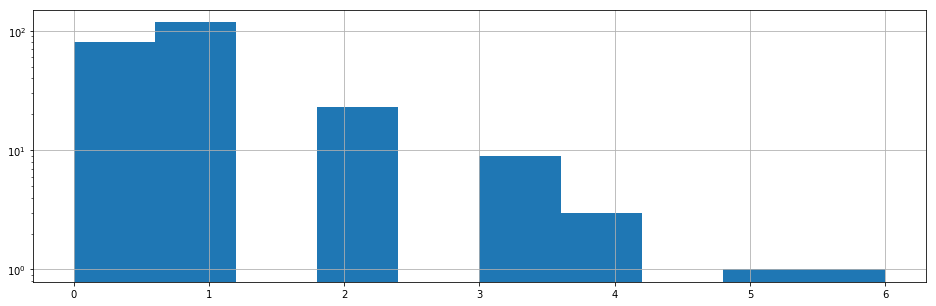

In [31]:
plt.rcParams["figure.figsize"] = (16, 5) # (w, h)

val_dataset = Dataset(is_test=False, include_negatives=True).load_indices('../data/indices/test_seg.npy', remove_unused=True)
print(len(val_dataset))

viz_hist(val_dataset)